## **Interpolation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import timeit

When interpolating, a function is sought that represents given discrete data (e.g. measurements). For given pairs of sampling points ($x_i$,$y_i$) with $i$ = 0, 1, 2..., n, the desired polynomial $p(x)$ must satisfy
<br>
$p(x_i) = y_i, \quad \text{for all} \quad i = 0, 1, 2, ..., n$
<br>
In order to find this polynomial, three following methods are introduced:

### *Naive method (Monomial basis)*

The polynomial has the standard formulation
<br>
$p(x) = a_0x^n + a_1x^{n-1} + a_2x^{n-2} + a_3x^{n-3} + ... + a_{n-1}x + a_n = \sum_{i=0}^n a_ix^{n-i}$

There exist in total n+1 equations, which can be rewritten in the Matrix-Vector multiplication form $A$.$a$ = $y$

$\begin{pmatrix}
x_0^n  & x_0^{n-1} & x_0^{n-2} & ... & x_0    & 1       \\
x_1^n  & x_1^{n-1} & x_1^{n-2} & ... & x_1    & 1       \\
\vdots & \vdots    & \vdots    &     & \vdots & \vdots  \\
x_n^n  & x_n^{n-1} & x_n^{n-2} & ... & x_n    & 1
\end{pmatrix}
\begin{pmatrix}
a_0    \\
a_1    \\
\vdots \\
a_n
\end{pmatrix}$
$=$ $\begin{pmatrix}
y_0    \\
y_1    \\
\vdots \\
y_n
\end{pmatrix}
$

The matrix is called *Vandermonde Matrix*. By solving the system of equations we can find the vector a, which contains the coefficients of the polynomial.



In [2]:
def naiv_inter(x,y,xi):
    n = len(x)

    # Create Vandermonde matrix size (n+1)x(n+1)
    mat_A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            mat_A[i,j] = pow(x[i],j)

    # Compute coefficients of the polynomial
    a = np.linalg.solve(mat_A,y)
    
    # Interpolation
    m = len(xi)
    yi = np.zeros(m)
    for i in range(m):
        for j in range(n):
            yi[i] += a[j] * pow(xi[i],j)
    return yi

Since the Vandermonde Matrix is poorly conditioned, we are prompted to condider the following methods:

### *Lagrange method*

In this method the polynomial $p(x)$ can be described by a linear combination of Lagrange polynomials
<br>
$p(x) = \sum_{k=0}^{n} y_k \cdot L_k(x)$


where the Lagrange polynomials are defined as
<br>
$L_k(x)$ = $\prod_{j=0,j!=k}$ $x-x_j \over x_k - x_j$

In [3]:
def lagrange_inter(x,y,xi):
    n = len(x)
    m = len(xi)
    yi = np.zeros(m)
    for i in range(m):
        for j in range(n):
            l = 1
            for k in range(n):
                if k!=j:
                    l = l*(xi[i]-x[k])/(x[j]-x[k])
            yi[i] += y[j]*l
    return yi

### *Newton method*

The polynomial is given by
<br>
$p(x) = f[x_0] + f[x_0,x_1](x-x_0) + f[x_0,x_1,x_2](x-x_0)(x-x_1) + ... + f[x_0,...,x_n](x-x_0)...(x-x_{n-1})$

The coefficients $f[...]$ are called divided difference and recursively defined by
<br>
$f[x_i] = f(x_i) = y_i$
<br>
$f[x_j,...,x_k] = (f[x_{j+1},...,x_k] - f[x_j,...,x_{k-1}]) / (x_k - x_j)$

In [4]:
def newton_inter(x, y, xi):
    n = len(x)
    yi = np.zeros(len(xi))
    computed_values = {}  # Dictionary to cache computed divided difference

    for i in range(len(xi)):
        factor = 1
        yi[i] = y[0]  # Start with the first y value 
        for j in range(1,n):
            factor *= (xi[i]-x[j-1])
            yi[i] += factor * f_di(x, y, 0, j, computed_values)
    return yi

# Compute the divided difference
def f_di(x, y, j, k, computed_values):
    if (j, k) in computed_values:  # Return cached result if available
        return computed_values[(j, k)]
    if j == k:
        result = y[j]
    else:
        result = (f_di(x, y, j+1, k, computed_values) - f_di(x, y, j, k-1, computed_values)) / (x[k] - x[j])

    computed_values[(j, k)] = result  # Cache the result

    return result

# *Test*

Using the implemented methods to interpolate data set.

In [5]:
x = np.array([0, 1, 2, 3])
y = np.array([-5, -6, -1, 16])
xi = np.array([0.5, 1.5, 2.5])
yi1 = naiv_inter(x,y,xi)
print('Naive method: yi = ',yi1)
yi2 = lagrange_inter(x,y,xi)
print('Lagrange method: yi = ',yi2)
yi3 = newton_inter(x,y,xi)
print('Newton method yi = ',yi3)

Naive method: yi =  [-5.875 -4.625  5.625]
Lagrange method: yi =  [-5.875 -4.625  5.625]
Newton method yi =  [-5.875 -4.625  5.625]


# *Using Interpolating Methods To Approximate Function*

Using the implemented methods to interpolate (approximate) the curve of the function $f(x) = sin(x)$ in the intervall [0,2] with various *n* sampling points.

In [6]:
# Define function f(x)=sin(x)
def f(x):
    return math.sin(x)

The sampling points should be chosen with the same distance magnitude $2-0 \over n-1$, in other words
<br>
$x_i = 0 + \frac{(2-0)(i-1)}{n-1}, \quad y_i = sin(x_i), \quad i \in \{1,...n\}$
<br>
which means $x_1=0$ and $x_n=2$

In [7]:
# Define the ntervall [0,2]
a = 0
b = 2

Sampling points

In [8]:
# Number of pairs of sampling points
n = 15

# Get the sampling points
x_samples = np.zeros(n)
y_samples = np.zeros(n)
for i in range(1,n+1):
    x_samples[i-1] = a + (b-a)*(i-1)/(n-1)
    y_samples[i-1] = f(x_samples[i-1])

Interpolation

In [9]:
# Solution of visualisation
m = 100

# Compute analytical result
x_plot = np.linspace(0, 2, 1000)
y_analytical = []
for x in x_plot:
    y_analytical.append(f(x))
    
# Interpolation
y_naive = naiv_inter(x_samples, y_samples, x_plot)
y_lagrange = lagrange_inter(x_samples, y_samples, x_plot)
y_newton = newton_inter(x_samples, y_samples, x_plot)

Compute the diviation

In [10]:
y_diff_naive = y_naive - y_analytical
y_diff_lagrange = y_lagrange - y_analytical
y_diff_newton = y_newton - y_analytical

Plot the results

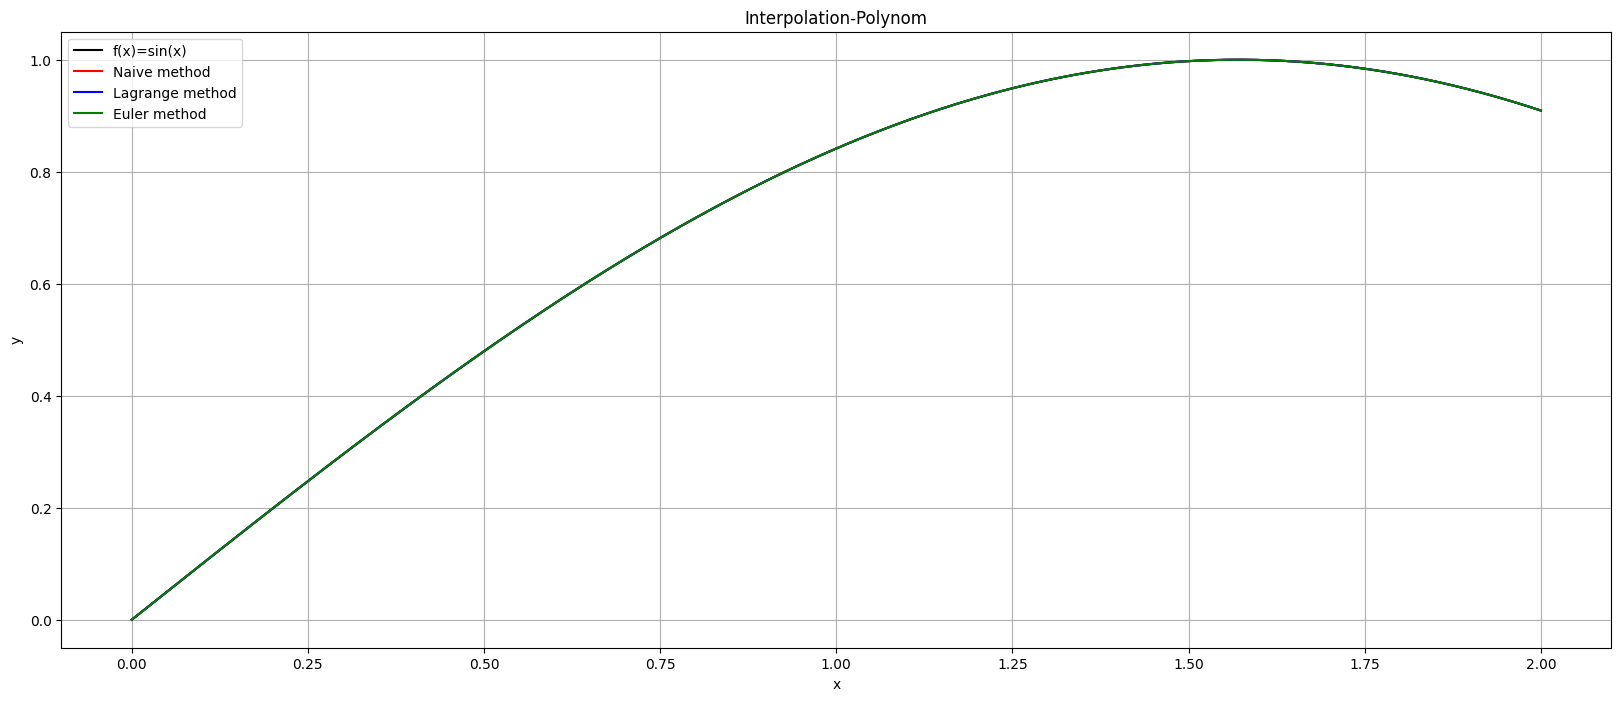

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(x_plot, y_analytical, label='f(x)=sin(x)', color='black')
plt.plot(x_plot,y_naive, color='red', label='Naive method')
plt.plot(x_plot,y_lagrange, color='blue', label='Lagrange method')
plt.plot(x_plot,y_newton, color='green', label='Euler method')

plt.title("Interpolation-Polynom")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

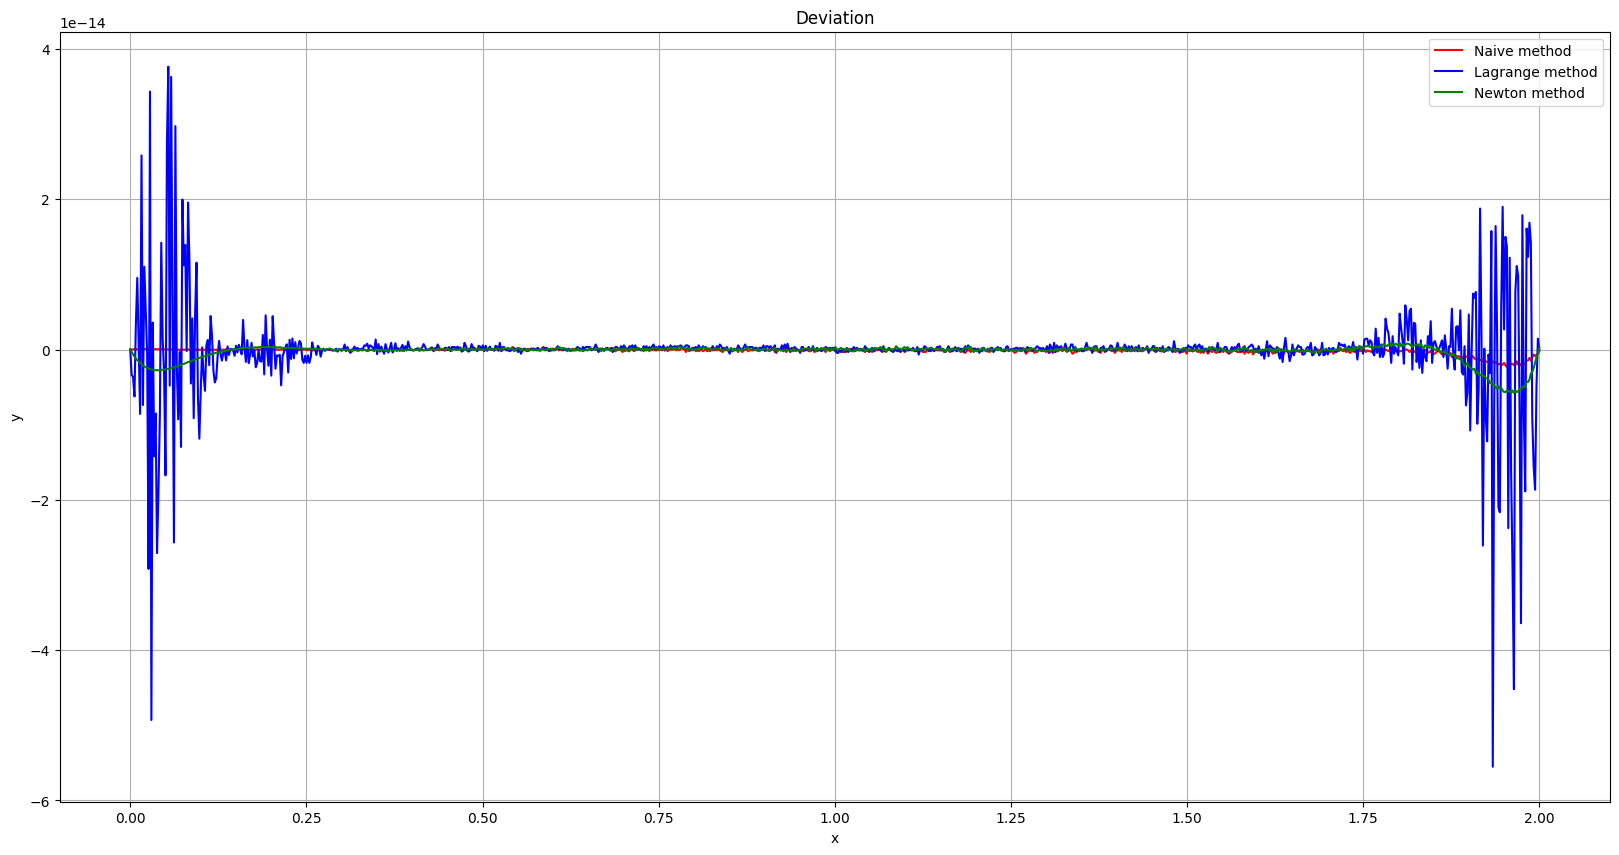

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(x_plot,y_diff_naive, color='red', label='Naive method')
plt.plot(x_plot,y_diff_lagrange, color='blue', label='Lagrange method')
plt.plot(x_plot,y_diff_newton, color='green', label='Newton method')
plt.title('Deviation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

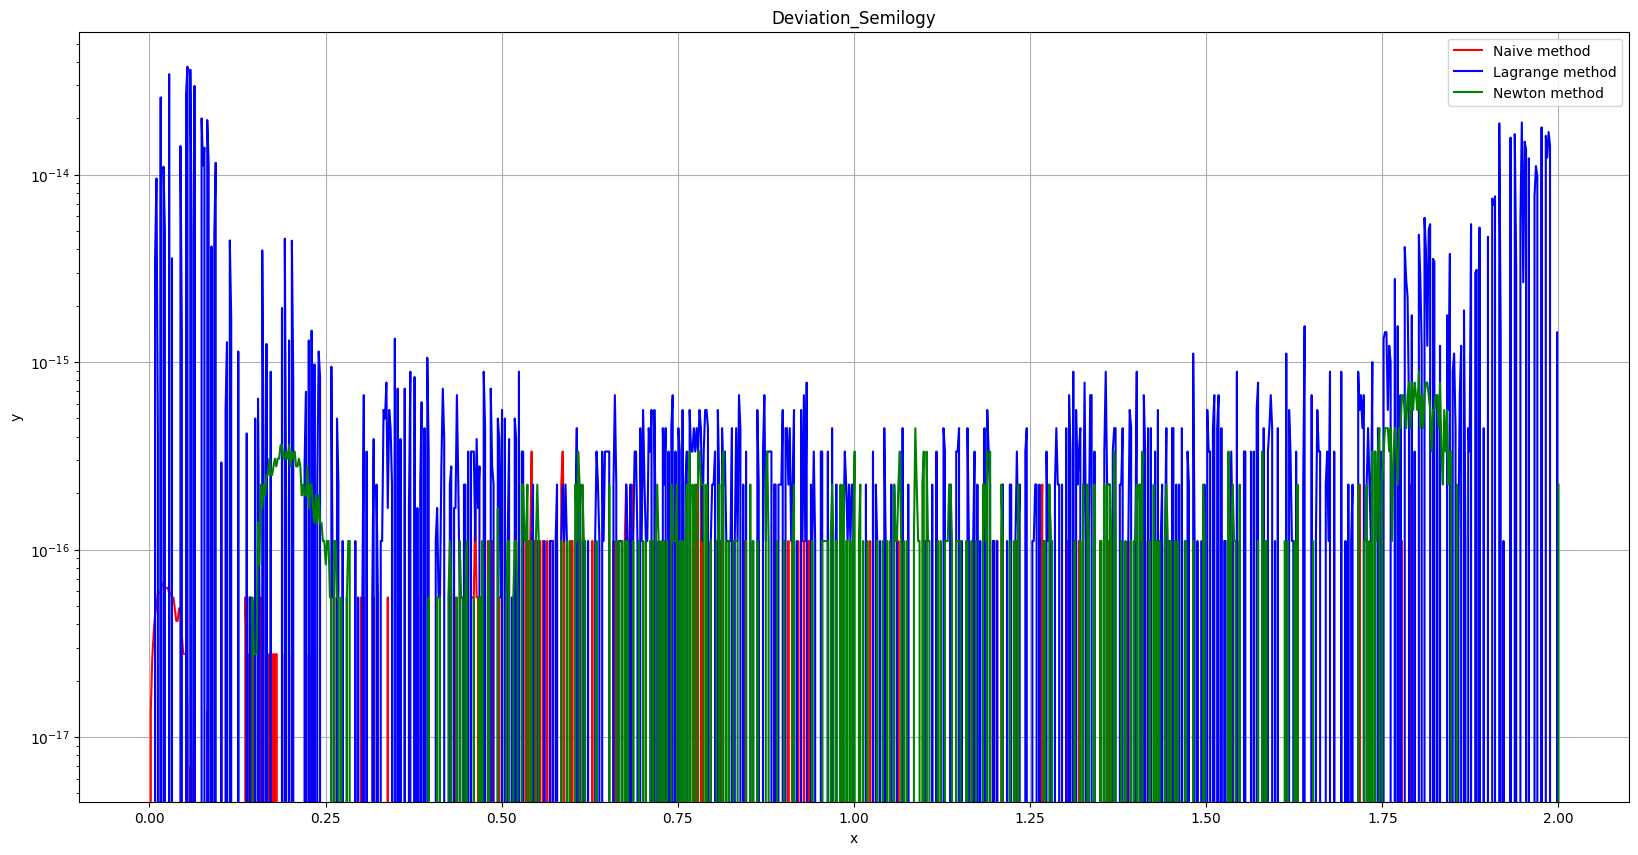

In [13]:
plt.figure(figsize=(20, 10))
plt.semilogy(x_plot,y_diff_naive, color='red', label='Naive method')
plt.semilogy(x_plot,y_diff_lagrange, color='blue', label='Lagrange method')
plt.semilogy(x_plot,y_diff_newton, color='green', label='Newton method')
plt.title('Deviation_Semilogy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()

## *Time Cost*

We are now intersted in the time cost of the methods.

In [14]:
# Measure execution time
%timeit naiv_inter(x_samples, y_samples, x_plot)
%timeit lagrange_inter(x_samples, y_samples, x_plot)
%timeit newton_inter(x_samples, y_samples, x_plot)

4.6 ms ± 168 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
67.2 ms ± 889 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.44 ms ± 114 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# *Conclusion*

When comparing the Monomial Basis, Lagrange, and Newton methods for polynomial interpolation, each method has its own advantages and drawbacks. Here’s a breakdown of each method:

1. Monomial Basis Interpolation
<br>
Advantages:
Simple form: It uses a straightforward polynomial form that is easy to understand and implement.
Closed-form: The equation is a standard polynomial expression.
<br>
<br>
Disadvantages:
Numerical instability: The computation of coefficients often involves solving a Vandermonde matrix, which can be ill-conditioned, leading to large numerical errors, especially for large datasets.
Inefficient for large datasets: Recomputing the coefficients for additional data points requires solving the entire system again.
<br>
<br>
Best use case:
Small datasets with low-degree polynomials where numerical instability is not a significant issue.

<br>

2. Lagrange Interpolation
<br>
Advantages:
No need to solve a system of equations: The coefficients are derived directly from the data points, so it avoids solving the Vandermonde matrix.
Flexibility: Easy to understand and implement for small datasets.
Exact fit: It guarantees the interpolation of given points.
<br>
<br>
Disadvantages:
Computationally expensive: Each evaluation requires computing a product of 𝑛 terms, making it inefficient for large datasets.
Poor scalability: Adding a new point requires recalculating the entire polynomial from scratch.
Numerical instability: Like the monomial basis, it can suffer from numerical issues for closely spaced points.
<br>
<br>
Best use case:
Small datasets with a known number of points and when the polynomial does not need to be updated with new data.

<br>

3. Newton's Interpolation
<br>
Advantages:
Efficient for updating: If you add new data points, you can extend the polynomial without recalculating everything.
Better numerical stability: Divided differences tend to be more stable than computing a full polynomial fit via the Vandermonde matrix.
Incremental calculation: The coefficients are computed in an incremental way, allowing for faster adjustments.
<br>
<br>
Disadvantages:
More complex implementation: Newton's form is a bit harder to implement compared to Lagrange, especially for beginners.
Sensitivity to data ordering: The method requires sorting or careful ordering of data points.
<br>
<br>
Best use case:
When the data size may grow, or new points need to be interpolated without recomputing the entire polynomial.
For larger datasets where numerical stability is more of a concern.

In most practical applications, Newton's interpolation is considered the best due to its balance of efficiency, numerical stability, and flexibility. However, for very large datasets, it's often better to use piecewise interpolation methods like spline interpolation, as they mitigate issues with high-degree polynomials.